In [72]:
import numpy as np
from math import e, sqrt, pi, floor
from itertools import islice

In [2]:
try:
    import matplotlib

    #matplotlib.use('agg')  # no interactive plotting, only save figures
    #import pylab
    from matplotlib import pyplot as plt
    ## This import registers the 3D projection, but is otherwise unused.
    #from mpl_toolkits.mplot3d import Axes3D
    #from mpl_toolkits.mplot3d.art3d import Line3DCollection # noqa: F401 unused import   
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection # noqa: F401 unused import    
    have_matplotlib = True
except ImportError:
    have_matplotlib = False

import csv
import pandas as pd
import scipy.io

In [3]:
file = 'features.csv'
features_space = pd.read_csv(file)
features_space.shape

(61, 730)

In [4]:
natom = features_space.shape[0]
ndim = features_space.shape[1]

outfile = 'Edges.csv'
with open(outfile, 'w') as output:
    writer = csv.writer(output, delimiter=' ')    
    for i in list(range(natom)):
        features_i = features_space.iloc[i, :].values
        #print(i,int(features_i[0]),features_i[1])
        for j in list(range(i+1,natom)):
            features_j = features_space.iloc[j, :].values
            #print(i,j,int(features_i[0]), int(features_j[0]))
            dist=0.0
            for k in list(range(1,ndim)):
                dist += (features_i[k] - features_j[k])**2
            print( int(features_i[0]), int(features_j[0]), dist)
            writer.writerow( [int(features_i[0]), int(features_j[0]), dist] )

3332 3333 0.6170564212609353
3332 3334 0.5894539854857177
3332 3335 1.8036672133581195
3332 3336 1.8129195508757343
3332 3337 29.440640391654608
3332 3338 69.66646602842165
3332 3339 70.42611656299643
3332 3340 30.034598238375224
3332 3356 3.1952518266338146
3332 3357 2.1427757663647347
3332 3358 4.40311789728961
3332 3359 31.41369095106103
3332 3360 71.805199180283
3332 3391 31.99868023115728
3332 3392 68.0836670301347
3332 3393 69.33611997978633
3332 3394 29.53508666223173
3332 3395 31.616951416980033
3332 3396 70.07070844304586
3332 3397 89.87975390176885
3332 3398 91.28637742431995
3332 3399 57.68601199076328
3332 3400 115.36405332956512
3332 3566 2.341673350514064
3332 3567 1.8935090020555547
3332 3568 3.368930800577865
3332 3569 33.08957571081557
3332 3570 69.78062641378196
3332 3579 4.440319403812173
3332 3580 29.802558040119933
3332 3596 30.541223317072006
3332 3597 69.44826574560199
3332 3598 32.747937282576395
3332 3599 91.66058748307402
3332 3600 91.12609588702092
3332 3931 

3337 3391 44.52607695400824
3337 3392 66.28847756365711
3337 3393 67.7455634587203
3337 3394 43.482188917507585
3337 3395 36.14902806305402
3337 3396 62.437074000680795
3337 3397 41.73466749240275
3337 3398 53.846485251693224
3337 3399 24.07321383288809
3337 3400 67.51603057941445
3337 3566 28.413253958537542
3337 3567 27.91564871772795
3337 3568 19.867192236193247
3337 3569 2.0380796618022674
3337 3570 21.498354936959046
3337 3579 28.328739530353854
3337 3580 3.3448892173725464
3337 3596 42.46503935558197
3337 3597 67.46662476769139
3337 3598 35.487834035740576
3337 3599 43.30236819678688
3337 3600 54.37100878941518
3337 3931 42.85628007088801
3337 3932 66.45524846434036
3337 3933 65.93573832555997
3337 3934 41.67808584121708
3337 3935 33.13636112834561
3337 3936 62.14930487044285
3337 3937 44.338654615665355
3337 3938 52.08867850624715
3337 3939 22.580720515731194
3337 3940 66.76569812720018
3337 3956 40.3587914960682
3337 3957 68.03472811079246
3337 3958 33.97419741502983
3337 3959 

3357 3993 45.27180506354777
3357 3994 105.82072971199969
3357 3995 82.46589316904425
3357 3996 79.75720872230767
3357 3997 69.10375616695349
3357 3998 122.18414917157703
3357 3999 120.52535005460449
3357 4000 118.98149479664802
3358 3359 18.43234308931859
3358 3360 55.46685909231211
3358 3391 20.28944204114792
3358 3392 53.0756998983948
3358 3393 54.20223354457371
3358 3394 18.376959780862126
3358 3395 17.709782793144875
3358 3396 53.314462095891145
3358 3397 67.81931433258035
3358 3398 69.08235540393423
3358 3399 36.26491761104357
3358 3400 92.66326255957883
3358 3566 5.173190655962789
3358 3567 4.714809633232546
3358 3568 3.4365490098062237
3358 3569 22.307488245572237
3358 3570 55.23981808079321
3358 3579 3.7746163502778085
3358 3580 16.87673754658077
3358 3596 19.0041985033376
3358 3597 54.47753272667635
3358 3598 18.532387483108376
3358 3599 69.38235293240092
3358 3600 68.99382130679211
3358 3931 30.138841327536483
3358 3932 63.44310997128035
3358 3933 63.16384646104104
3358 3934 

3394 3596 1.4052292000057245
3394 3597 21.16595484400444
3394 3598 3.6606716751897137
3394 3599 54.49198418965308
3394 3600 42.553915240732884
3394 3931 45.34503348162944
3394 3932 68.76259136782335
3394 3933 68.5442924417232
3394 3934 43.508179354400376
3394 3935 42.88280286151223
3394 3936 68.98932750094241
3394 3937 80.18806682323702
3394 3938 77.84718705790966
3394 3939 56.96458141327647
3394 3940 95.6074578964866
3394 3956 34.68098071034058
3394 3957 65.38506587021425
3394 3958 35.86545279100573
3394 3959 74.75403377082972
3394 3960 74.95736951014202
3394 3991 43.83117591278091
3394 3992 54.36200890882764
3394 3993 22.68900984876229
3394 3994 68.78287466693205
3394 3995 45.03753477196977
3394 3996 54.097773042929695
3394 3997 42.836270975960716
3394 3998 84.20695024715194
3394 3999 88.55685780914263
3394 4000 81.54682019831107
3395 3396 19.03486727075882
3395 3397 44.71408324321987
3395 3398 34.630030450403225
3395 3399 15.789489659932341
3395 3400 58.10215755374186
3395 3566 30.7

3568 3931 21.45401660335747
3568 3932 56.718885875527796
3568 3933 56.57817059500744
3568 3934 19.25585039915655
3568 3935 18.712021907287333
3568 3936 57.127112975699276
3568 3937 74.3497643722842
3568 3938 70.05527452806946
3568 3939 37.04551252300264
3568 3940 96.77338158865884
3568 3956 19.602643306051057
3568 3957 59.91852204662671
3568 3958 20.136902829428436
3568 3959 72.6286202049861
3568 3960 72.93488276860352
3568 3991 79.57256833849796
3568 3992 76.95211902275554
3568 3993 44.90200826759047
3568 3994 102.26831494526846
3568 3995 79.66426914928914
3568 3996 75.05204262293375
3568 3997 61.59410548251322
3568 3998 114.36838577298911
3568 3999 112.04856279347322
3568 4000 111.55607331785654
3569 3570 17.223833366117486
3569 3579 28.026889288353022
3569 3580 2.1347007452939275
3569 3596 40.83983502925902
3569 3597 62.369342545461315
3569 3598 33.04301012083933
3569 3599 37.87007727008271
3569 3600 48.5380926637048
3569 3931 35.7736360451968
3569 3932 58.09591426753235
3569 3933 5

3933 3936 1.1177732600846588
3933 3937 47.53333147519237
3933 3938 14.84376285307728
3933 3939 28.960967395347968
3933 3940 37.120566202707415
3933 3956 22.480003700278427
3933 3957 0.9535281461733444
3933 3958 20.66758817680509
3933 3959 46.16680656928833
3933 3960 17.494335085214164
3933 3991 49.99722253431283
3933 3992 16.33486729493078
3933 3993 31.45280607219924
3933 3994 38.79159367203832
3933 3995 50.17158094099396
3933 3996 17.05787076970201
3933 3997 40.98985670964992
3933 3998 70.7851874055701
3933 3999 50.04594886777019
3933 4000 50.36372014850427
3934 3935 2.0725556082649508
3934 3936 23.85780084687052
3934 3937 54.44330341867145
3934 3938 41.02937460517902
3934 3939 21.433225951946802
3934 3940 68.0863896301129
3934 3956 1.631943639991339
3934 3957 25.30497240732258
3934 3958 2.915508030550918
3934 3959 53.03593689770497
3934 3960 44.09486298634128
3934 3991 55.24527499347754
3934 3992 43.17226308697367
3934 3993 23.173048029799816
3934 3994 69.6778586705071
3934 3995 56.4

In [5]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
Edges = pd.read_csv('Edges.csv', sep=' ', header=None , names=['Start', 'End', 'Distance'])
Edges

,Start,End,Distance
0,3332,3333,0.617056
1,3332,3334,0.589454
2,3332,3335,1.803667
3,3332,3336,1.812920
4,3332,3337,29.440640
...,...,...,...
1825,3997,3999,23.082015
1826,3997,4000,22.246604
1827,3998,3999,12.907107
1828,3998,4000,12.074174


In [66]:
#Edges.columns
Edges_sorted = Edges.sort_values(by=['Distance']).reset_index(drop=True)
Edges_sorted
#print(len(Edges_sorted.columns), len(Edges_sorted.index))

,Start,End,Distance
0,3338,3339,0.327446
1,3392,3393,0.375661
2,3337,3340,0.405110
3,3932,3933,0.431096
4,3333,3334,0.460145
...,...,...,...
1825,3332,3999,131.019823
1826,3334,3999,131.891016
1827,3333,3998,132.611716
1828,3332,3998,133.068301


In [37]:
def construct_graph(df, rcut):
    G = nx.Graph()
    natom = len(df.index)
    ndim  = len(df.columns)
    for i in list(range(natom)):
        features_i = features_space.iloc[i, :].values
        #print(i,int(features_i[0]),features_i[1])
        for j in list(range(i+1,natom)):
            features_j = features_space.iloc[j, :].values
            dist=0.0
            for k in list(range(1,ndim)):
                dist += (features_i[k] - features_j[k])**2
            
            if dist <= rcut:
                e = ( str(int(features_i[0])), str(int(features_j[0])), dist )
                G.add_weighted_edges_from([(e)])               
    return G

True


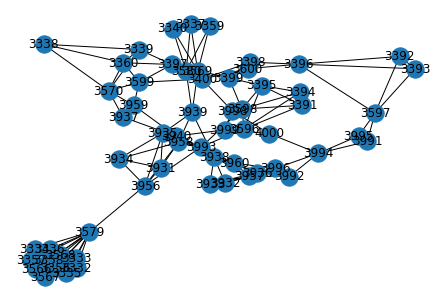

In [44]:
G = construct_graph(features_space, 16.0)
nx.draw(G, with_labels=True)
print(nx.is_connected(G))

In [71]:
#使用二分搜尋法找用最小cutoff radius做成的聯通圖
left, right = 0, len(Edges_sorted.index)-1
#結束條件是區間內剩兩個以下數字的時候
while (right-left+1) > 2:
    mid = floor((right-left)/2) + left   #避免overflow
    print(left, right, mid, Edges_sorted.at[mid, 'Distance'] )
    G = construct_graph(features_space, Edges_sorted.at[mid,'Distance'])
    #if Edges_sorted.at[mid, 'Distance'] > 10.0:
    if nx.is_connected(G):
        right = mid -1
        print(mid, Edges_sorted.at[mid, 'Distance'], 'True')
    else:
        left = mid
        print(mid, Edges_sorted.at[mid, 'Distance'], 'False')

#到這邊只會剩下兩個元素
mid=left+1
G = construct_graph(features_space, Edges_sorted.at[mid,'Distance'])
print(mid, Edges_sorted.at[mid, 'Distance'], nx.is_connected(G))
if nx.is_connected(G):
    pass
else:
    mid=left+2
    G = construct_graph(features_space, Edges_sorted.at[mid,'Distance'])
    print(mid, Edges_sorted.at[mid, 'Distance'], nx.is_connected(G))

0 1829 914 48.49240014347574
914 48.49240014347574 True
0 913 456 28.19008046914141
456 28.19008046914141 True
0 455 227 18.369310000845577
227 18.369310000845577 True
0 226 113 4.440319403812173
113 4.440319403812173 False
113 226 169 15.811828199331012
169 15.811828199331012 True
113 168 140 12.079060329256391
140 12.079060329256391 False
140 168 154 14.469704850511965
154 14.469704850511965 False
154 168 161 15.426189945670323
161 15.426189945670323 False
161 168 164 15.631397333150046
164 15.631397333150046 True
161 163 162 15.558901264368869
162 15.558901264368869 False
163 15.587819157805855 False
164 15.631397333150046 True


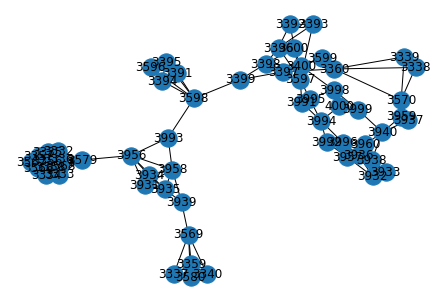

In [69]:
nx.draw(G, with_labels=True)

In [73]:
# https://python-louvain.readthedocs.io/en/latest/ 
# community.best_partition回傳的物件是dict，利用.values取出各群的內容，。
# 利用set建立無序的資料集合，再用len取得這個集合的長度，這就是分群後的結果。
def calculate_modularity(G):
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    #print("community:", size)
    # community.modularity就直接計算modularity，graph太大的話，就要考慮自己實做平行版本的modularity
    mod = community.modularity(partition,G)
    #print("modularity:", mod)
    return size, mod

In [74]:
comm, mod = calculate_modularity(G)
print("community:", comm)
print("modularity:", mod)

community: 6.0
modularity: 0.6984979428397997


In [79]:
for index, row in islice(Edges_sorted.iterrows(), mid, None):
    #print(index, row['Distance'])
    G = construct_graph(features_space, row['Distance'])
    comm, mod = calculate_modularity(G)
    print(index, "community=", comm, "modularity=", mod)

164 community= 5.0 modularity= 0.6952831766299251
165 community= 6.0 modularity= 0.7014308250718112
166 community= 6.0 modularity= 0.6860225140462358
167 community= 6.0 modularity= 0.6860225140462358
168 community= 6.0 modularity= 0.6872891698021192
169 community= 6.0 modularity= 0.6823570825321488
170 community= 6.0 modularity= 0.6823570825321488
171 community= 6.0 modularity= 0.6728200402733656
172 community= 6.0 modularity= 0.67700785074339
173 community= 6.0 modularity= 0.6787486724989554
174 community= 6.0 modularity= 0.6787486724989554
175 community= 6.0 modularity= 0.664064286554265
176 community= 5.0 modularity= 0.6415389324526543
177 community= 7.0 modularity= 0.634558677742974
178 community= 7.0 modularity= 0.6387721103638917
179 community= 7.0 modularity= 0.6387721103638917
180 community= 6.0 modularity= 0.6463913468203611
181 community= 6.0 modularity= 0.6491172300055569
182 community= 6.0 modularity= 0.6514376888412207
183 community= 6.0 modularity= 0.6380774565195642
184 

328 community= 5.0 modularity= 0.46256993964762705
329 community= 5.0 modularity= 0.463321102883982
330 community= 5.0 modularity= 0.4592541660828533
331 community= 4.0 modularity= 0.4528566948242359
332 community= 5.0 modularity= 0.45387154306691724
333 community= 5.0 modularity= 0.45374362189341955
334 community= 5.0 modularity= 0.45072942043693864
335 community= 5.0 modularity= 0.4506258305231444
336 community= 5.0 modularity= 0.44244685201846423
337 community= 4.0 modularity= 0.44392137199798803
338 community= 5.0 modularity= 0.4466465749906221
339 community= 5.0 modularity= 0.4486538076183972
340 community= 3.0 modularity= 0.43069723211866284
341 community= 5.0 modularity= 0.44089072839797544
342 community= 3.0 modularity= 0.4419998979215878
343 community= 5.0 modularity= 0.4323860101980529
344 community= 4.0 modularity= 0.4420685988186206
345 community= 4.0 modularity= 0.44570511024490467
346 community= 4.0 modularity= 0.4364852576184502
347 community= 4.0 modularity= 0.446499876

491 community= 4.0 modularity= 0.3225929312938539
492 community= 4.0 modularity= 0.29613281006957104
493 community= 3.0 modularity= 0.29603114606346825
494 community= 4.0 modularity= 0.3203654629174888
495 community= 3.0 modularity= 0.31833219245132083
496 community= 3.0 modularity= 0.3057083870822944
497 community= 3.0 modularity= 0.31838263311165393
498 community= 3.0 modularity= 0.30075860809810573
499 community= 3.0 modularity= 0.32083429701229116
500 community= 3.0 modularity= 0.3089346147007226
501 community= 4.0 modularity= 0.3176998572150457
502 community= 4.0 modularity= 0.3211823930137998
503 community= 4.0 modularity= 0.30802723484849315
504 community= 3.0 modularity= 0.30852919573920845
505 community= 4.0 modularity= 0.2970017846499832
506 community= 4.0 modularity= 0.3067843394458806
507 community= 4.0 modularity= 0.29995433294052937
508 community= 4.0 modularity= 0.32006164342656923
509 community= 4.0 modularity= 0.31707597505059537
510 community= 3.0 modularity= 0.312796

654 community= 3.0 modularity= 0.2786262118847732
655 community= 2.0 modularity= 0.2847955603370421
656 community= 2.0 modularity= 0.28271822371365174
657 community= 2.0 modularity= 0.2806497021859171
658 community= 2.0 modularity= 0.28161700877139517
659 community= 2.0 modularity= 0.28161700877139517
660 community= 3.0 modularity= 0.27278064971417815
661 community= 2.0 modularity= 0.2823460108269855
662 community= 2.0 modularity= 0.28257674284245415
663 community= 2.0 modularity= 0.28052060059564676
664 community= 2.0 modularity= 0.2807514726563065
665 community= 2.0 modularity= 0.2807514726563065
666 community= 2.0 modularity= 0.27893624377529436
667 community= 2.0 modularity= 0.27993239825556826
668 community= 2.0 modularity= 0.2778941406219275
669 community= 2.0 modularity= 0.27887950711878595
670 community= 2.0 modularity= 0.27887950711878595
671 community= 2.0 modularity= 0.2800943868485156
672 community= 2.0 modularity= 0.2810591804132513
673 community= 2.0 modularity= 0.2820104

817 community= 2.0 modularity= 0.23448197304220172
818 community= 2.0 modularity= 0.23286941893494453
819 community= 2.0 modularity= 0.23126305150501775
820 community= 2.0 modularity= 0.22966354060863386
821 community= 2.0 modularity= 0.22806889277313486
822 community= 2.0 modularity= 0.22648065260751912
823 community= 2.0 modularity= 0.22648065260751912
824 community= 2.0 modularity= 0.22767142767951465
825 community= 2.0 modularity= 0.22827069948482814
826 community= 2.0 modularity= 0.22668632456680554
827 community= 2.0 modularity= 0.22727423137405514
828 community= 2.0 modularity= 0.22727423137405514
829 community= 2.0 modularity= 0.22845851003621911
830 community= 2.0 modularity= 0.2268787799255242
831 community= 2.0 modularity= 0.2268787799255242
832 community= 2.0 modularity= 0.22373868365964555
833 community= 2.0 modularity= 0.22434221436822635
834 community= 2.0 modularity= 0.22493127308718508
835 community= 2.0 modularity= 0.22336777390965218
836 community= 2.0 modularity= 0.

979 community= 2.0 modularity= 0.2020036386889207
980 community= 2.0 modularity= 0.2020036386889207
981 community= 2.0 modularity= 0.20126305738093345
982 community= 2.0 modularity= 0.19998055713041674
983 community= 2.0 modularity= 0.20015759080600778
984 community= 2.0 modularity= 0.1974204200403522
985 community= 2.0 modularity= 0.19757351115556904
986 community= 2.0 modularity= 0.19757351115556904
987 community= 2.0 modularity= 0.19673453779620922
988 community= 2.0 modularity= 0.19546546124467815
989 community= 2.0 modularity= 0.19410763549400625
990 community= 2.0 modularity= 0.19420074605272414
991 community= 2.0 modularity= 0.19323536299137864
992 community= 2.0 modularity= 0.19323536299137864
993 community= 2.0 modularity= 0.19227541169941054
994 community= 2.0 modularity= 0.19445652573878547
995 community= 2.0 modularity= 0.1939590667327038
996 community= 2.0 modularity= 0.19269184410785456
997 community= 2.0 modularity= 0.19307165970110243
998 community= 2.0 modularity= 0.19

1138 community= 4.0 modularity= 0.12610249647788174
1139 community= 4.0 modularity= 0.12646656433521739
1140 community= 4.0 modularity= 0.1259700345905398
1141 community= 3.0 modularity= 0.1260715163698163
1142 community= 3.0 modularity= 0.12681871515143223
1143 community= 3.0 modularity= 0.1255480694975143
1144 community= 3.0 modularity= 0.12521738400366783
1145 community= 4.0 modularity= 0.12383645282715179
1146 community= 4.0 modularity= 0.1220733284677
1147 community= 4.0 modularity= 0.12248713840061219
1148 community= 3.0 modularity= 0.1223314535206543
1149 community= 4.0 modularity= 0.12186031909574771
1150 community= 4.0 modularity= 0.12139282426788242
1151 community= 4.0 modularity= 0.11971376126145897
1152 community= 4.0 modularity= 0.12039165937195123
1153 community= 4.0 modularity= 0.11822306984634014
1154 community= 4.0 modularity= 0.1186022122729012
1155 community= 3.0 modularity= 0.11916470617031036
1156 community= 4.0 modularity= 0.11592460736676477
1157 community= 4.0 m

1297 community= 3.0 modularity= 0.08970295716858426
1298 community= 4.0 modularity= 0.08762633359760322
1299 community= 3.0 modularity= 0.08994838489542922
1300 community= 3.0 modularity= 0.09142725824935014
1301 community= 3.0 modularity= 0.09185084517553117
1302 community= 3.0 modularity= 0.0893673844385209
1303 community= 3.0 modularity= 0.08146966224375754
1304 community= 4.0 modularity= 0.07662606939692336
1305 community= 3.0 modularity= 0.08453146970422387
1306 community= 3.0 modularity= 0.08730103843513953
1307 community= 3.0 modularity= 0.09178874779483288
1308 community= 3.0 modularity= 0.09126749912280607
1309 community= 3.0 modularity= 0.09123576162228292
1310 community= 3.0 modularity= 0.09060709939188642
1311 community= 3.0 modularity= 0.08798067685811796
1312 community= 3.0 modularity= 0.08922497961459312
1313 community= 3.0 modularity= 0.08593916280695132
1314 community= 3.0 modularity= 0.08721492250329466
1315 community= 3.0 modularity= 0.08897823894077576
1316 communit

1455 community= 3.0 modularity= 0.07927414798827156
1456 community= 3.0 modularity= 0.07769271742749359
1457 community= 2.0 modularity= 0.078063639937405
1458 community= 3.0 modularity= 0.07914818985407103
1459 community= 3.0 modularity= 0.07971090813856821
1460 community= 2.0 modularity= 0.07496320905508494
1461 community= 2.0 modularity= 0.07928947911121859
1462 community= 3.0 modularity= 0.0802867381140326
1463 community= 3.0 modularity= 0.07946910577824867
1464 community= 3.0 modularity= 0.07946910577824867
1465 community= 3.0 modularity= 0.07718562992471942
1466 community= 2.0 modularity= 0.077800012536619
1467 community= 2.0 modularity= 0.07724898849538703
1468 community= 2.0 modularity= 0.07603320415685544
1469 community= 3.0 modularity= 0.07820064991041878
1470 community= 3.0 modularity= 0.07721911743964904
1471 community= 3.0 modularity= 0.0781241941349449
1472 community= 3.0 modularity= 0.0781241941349449
1473 community= 3.0 modularity= 0.07591745180771473
1474 community= 2.0

1614 community= 3.0 modularity= 0.060637736581485815
1615 community= 3.0 modularity= 0.06004856837874016
1616 community= 3.0 modularity= 0.06004856837874016
1617 community= 3.0 modularity= 0.05915711528516923
1618 community= 3.0 modularity= 0.06029142132685172
1619 community= 3.0 modularity= 0.06087186550634064
1620 community= 3.0 modularity= 0.056790816199630334
1621 community= 3.0 modularity= 0.06085369548185679
1622 community= 3.0 modularity= 0.058539507824043095
1623 community= 3.0 modularity= 0.05996874900971853
1624 community= 3.0 modularity= 0.0593753365936786
1625 community= 3.0 modularity= 0.0587823731173706
1626 community= 3.0 modularity= 0.058987726391082185
1627 community= 3.0 modularity= 0.058406731894030686
1628 community= 3.0 modularity= 0.05454450649016074
1629 community= 3.0 modularity= 0.058624666256633484
1630 community= 3.0 modularity= 0.05714886835846229
1631 community= 3.0 modularity= 0.05804533513537837
1632 community= 3.0 modularity= 0.05731329648795187
1633 com

1772 community= 3.0 modularity= 0.019066255546388605
1773 community= 2.0 modularity= 0.03544692689057788
1774 community= 2.0 modularity= 0.03443633270270949
1775 community= 2.0 modularity= 0.0339780712958708
1776 community= 2.0 modularity= 0.03368069801108989
1777 community= 2.0 modularity= 0.03283161285981229
1778 community= 2.0 modularity= 0.03233422341875972
1779 community= 2.0 modularity= 0.031292271331844035
1780 community= 2.0 modularity= 0.030967297675732447
1781 community= 2.0 modularity= 0.029720198891080157
1782 community= 2.0 modularity= 0.029639421014925532
1783 community= 2.0 modularity= 0.028430383176302948
1784 community= 2.0 modularity= 0.028657467821250976
1785 community= 2.0 modularity= 0.028086329282716455
1786 community= 2.0 modularity= 0.0279826679174775
1787 community= 2.0 modularity= 0.027384551563087334
1788 community= 2.0 modularity= 0.027736435808646653
1789 community= 2.0 modularity= 0.028319796771813815
1790 community= 2.0 modularity= 0.026427701665119263
17

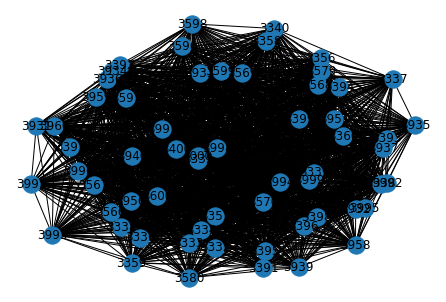

In [14]:
#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(E)):    
    e = ( str(int(E[i,0])), str(int(E[i,1])), E[i,2] )
    G.add_weighted_edges_from([(e)])

nx.draw(G, with_labels=True)

In [10]:
E = np.array(Edges.iloc[:, 0:3].values)
E

array([[3.33200000e+03, 3.33300000e+03, 6.17056421e-01],
       [3.33200000e+03, 3.33400000e+03, 5.89453985e-01],
       [3.33200000e+03, 3.33500000e+03, 1.80366721e+00],
       ...,
       [3.99800000e+03, 3.99900000e+03, 1.29071070e+01],
       [3.99800000e+03, 4.00000000e+03, 1.20741736e+01],
       [3.99900000e+03, 4.00000000e+03, 1.19096113e+01]])

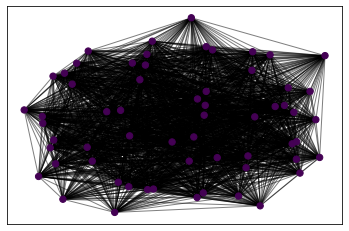

In [16]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = matplotlib.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

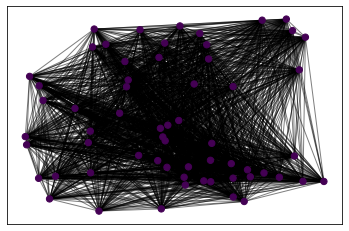

In [17]:
# draw the graph
pos = nx.random_layout(G)
# color the nodes according to their partition
cmap = matplotlib.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

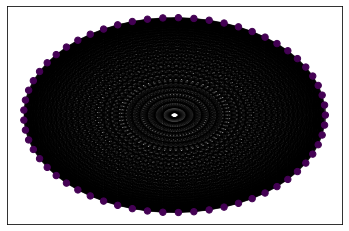

In [18]:
# draw the graph
pos = nx.circular_layout(G)
# color the nodes according to their partition
cmap = matplotlib.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

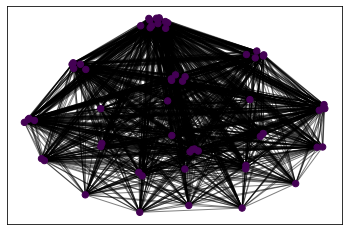

In [21]:
# draw the graph
pos = nx.kamada_kawai_layout(G)
# color the nodes according to their partition
cmap = matplotlib.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()